#### Tomas Vintimilla

# Capstone Project

### Practical implementation

In [1]:
import pandas as pd

In [2]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [3]:
pd.set_option('display.max_rows', None)

In [6]:
data = pd.read_spss("/Users/tomas/Downloads/journal.pone.0250225.s001.sav")

In [7]:
data.head()

Level servedirection1wide.2t  serverdisttonetxatROS  \
0  Alto                Lateral                 5.2439   
1  Alto                Lateral                 5.3255   
2  Alto                Lateral                 5.5047   
3  Alto                Lateral                 5.8490   
4  Alto                Lateral                 5.6027   

   shottoshottimeservetoROS  servefromlatROS  servermaxvelfromservetoROS  \
0                      1.12           3.5833                      3.5330   
1                      1.28           3.1337                      3.1694   
2                      1.16              NaN                      3.0379   
3                      1.00           3.5574                      3.1744   
4                      1.12           3.2141                      3.0464   

   serverdistancefromservetoROS  SHOT_OUTCOME @1deuce2adv AUSTRALIANAJESUS  \
0                        2.8300           1.0       Deuce              Aus   
1                        3.2483           1.0       Deuce              Aus   
2                        2.9204           1.0       Deuce              Aus   
3                        2.5028           1.0       Deuce              Aus   
4                        2.8490           1.0       Deuce              Aus   

   SAQUESERROROLET GANAELPUNTO  RALLY  MATCH  SET      filter_$ tacticanivel  \
0              0.0         NaN   22.0    1.0  1.0  Not Selected     aus alto   
1              0.0         NaN   37.0    1.0  2.0  Not Selected     aus alto   
2              0.0       Sacan    1.0    1.0  1.0  Not Selected     aus alto   
3              0.0       Sacan    4.0    1.0  1.0  Not Selected     aus alto   
4              0.0       Sacan   26.0    1.0  1.0  Not Selected     aus alto   

   Juegos  
0     3.0  
1     5.0  
2     1.0  
3     1.0  
4     4.0

In [8]:
data.shape

(2057, 18)

### Preparation

Various approaches were taken to play with the variables before performing faeture engineering, some of these were not taken into account in the final models.

In [9]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

Missing values in each column:
 servefromlatROS     1
GANAELPUNTO        16
dtype: int64


In [14]:
new_df = data.copy()

In [15]:
# Handling missing values for 'servefromlatROS'
# Imputation with the median
new_df['servefromlatROS'].fillna(new_df['servefromlatROS'].median(), inplace=True)

# Removing rows with missing target variable 'GANAELPUNTO'
new_df.dropna(subset=['GANAELPUNTO'], inplace=True)

In [16]:
print("Missing values after handling:\n", new_df.isnull().sum())

Missing values after handling:
 Level                           0
servedirection1wide.2t          0
serverdisttonetxatROS           0
shottoshottimeservetoROS        0
servefromlatROS                 0
servermaxvelfromservetoROS      0
serverdistancefromservetoROS    0
SHOT_OUTCOME                    0
@1deuce2adv                     0
AUSTRALIANAJESUS                0
SAQUESERROROLET                 0
GANAELPUNTO                     0
RALLY                           0
MATCH                           0
SET                             0
filter_$                        0
tacticanivel                    0
Juegos                          0
dtype: int64


In [17]:
new_df.shape

(2041, 18)

In [20]:
new_df.head()

Level servedirection1wide.2t  serverdisttonetxatROS  \
2  Alto                Lateral                 5.5047   
3  Alto                Lateral                 5.8490   
4  Alto                Lateral                 5.6027   
5  Alto                Lateral                 5.2342   
6  Alto                Lateral                 5.1111   

   shottoshottimeservetoROS  servefromlatROS  servermaxvelfromservetoROS  \
2                      1.16          3.66885                      3.0379   
3                      1.00          3.55740                      3.1744   
4                      1.12          3.21410                      3.0464   
5                      1.48          3.41250                      2.4721   
6                      1.28          3.11240                      3.1198   

   serverdistancefromservetoROS  SHOT_OUTCOME @1deuce2adv AUSTRALIANAJESUS  \
2                        2.9204           1.0       Deuce              Aus   
3                        2.5028           1.0       Deuce              Aus   
4                        2.8490           1.0       Deuce              Aus   
5                        2.9579           1.0       Deuce              Aus   
6                        3.2923           1.0       Deuce              Aus   

   SAQUESERROROLET GANAELPUNTO  RALLY  MATCH  SET      filter_$ tacticanivel  \
2              0.0       Sacan    1.0    1.0  1.0  Not Selected     aus alto   
3              0.0       Sacan    4.0    1.0  1.0  Not Selected     aus alto   
4              0.0       Sacan   26.0    1.0  1.0  Not Selected     aus alto   
5              0.0       Sacan   47.0    1.0  1.0  Not Selected     aus alto   
6              0.0       Sacan   49.0    1.0  1.0  Not Selected     aus alto   

   Juegos  
2     1.0  
3     1.0  
4     4.0  
5     6.0  
6     7.0

In [21]:
new_df.to_csv('new_padel_df.csv', index=False)

In [22]:
df = pd.read_csv('/Users/tomas/Desktop/new_padel_df.csv')
df.head()

Level servedirection1wide.2t  serverdisttonetxatROS  \
0  Alto                Lateral                 5.5047   
1  Alto                Lateral                 5.8490   
2  Alto                Lateral                 5.6027   
3  Alto                Lateral                 5.2342   
4  Alto                Lateral                 5.1111   

   shottoshottimeservetoROS  servefromlatROS  servermaxvelfromservetoROS  \
0                      1.16          3.66885                      3.0379   
1                      1.00          3.55740                      3.1744   
2                      1.12          3.21410                      3.0464   
3                      1.48          3.41250                      2.4721   
4                      1.28          3.11240                      3.1198   

   serverdistancefromservetoROS  SHOT_OUTCOME @1deuce2adv AUSTRALIANAJESUS  \
0                        2.9204           1.0       Deuce              Aus   
1                        2.5028           1.0       Deuce              Aus   
2                        2.8490           1.0       Deuce              Aus   
3                        2.9579           1.0       Deuce              Aus   
4                        3.2923           1.0       Deuce              Aus   

   SAQUESERROROLET GANAELPUNTO  RALLY  MATCH  SET      filter_$ tacticanivel  \
0              0.0       Sacan    1.0    1.0  1.0  Not Selected     aus alto   
1              0.0       Sacan    4.0    1.0  1.0  Not Selected     aus alto   
2              0.0       Sacan   26.0    1.0  1.0  Not Selected     aus alto   
3              0.0       Sacan   47.0    1.0  1.0  Not Selected     aus alto   
4              0.0       Sacan   49.0    1.0  1.0  Not Selected     aus alto   

   Juegos  
0     1.0  
1     1.0  
2     4.0  
3     6.0  
4     7.0

#### Sorting by Match ID and rally order

In [25]:
sorted_df = df.sort_values(by=['Level', 'MATCH', 'SET', 'RALLY'], ascending=[True, True, True, True])

In [26]:
sorted_df

Level servedirection1wide.2t  serverdisttonetxatROS  \
0     Alto                Lateral                 5.5047   
1464  Alto                Lateral                 4.9810   
1     Alto                Lateral                 5.8490   
1355  Alto                Lateral                 5.4872   
75    Alto                Lateral                 6.4675   
1356  Alto                Lateral                 4.5531   
668   Alto                Lateral                 6.2616   
440   Alto                Lateral                 5.6001   
669   Alto                Lateral                 6.0397   
441   Alto                Lateral                 5.0013   
855   Alto                    "T"                 5.5419   
350   Alto                Lateral                 4.1114   
670   Alto                Lateral                 5.4277   
351   Alto                Lateral                 4.1788   
856   Alto                    "T"                 5.0759   
352   Alto                Lateral                 4.9586   
129   Alto                    "T"                 4.2641   
1357  Alto                Lateral                 5.1774   
1358  Alto                Lateral                 3.9959   
2     Alto                Lateral                 5.6027   
1359  Alto                Lateral                 5.3406   
130   Alto                    "T"                 5.1642   
1563  Alto                    "T"                 5.0204   
671   Alto                Lateral                 5.3279   
442   Alto                Lateral                 5.5941   
672   Alto                Lateral                 6.2211   
353   Alto                Lateral                 5.6422   
673   Alto                Lateral                 6.2515   
786   Alto                Lateral                 5.8552   
443   Alto                Lateral                 4.5263   
912   Alto                    "T"                 4.7616   
518   Alto                    "T"                 4.8049   
674   Alto                Lateral                 5.3894   
444   Alto                Lateral                 5.1149   
131   Alto                    "T"                 4.9309   
1465  Alto                Lateral                 5.0358   
208   Alto                    "T"                 4.4757   
1466  Alto                Lateral                 4.6715   
3     Alto                Lateral                 5.2342   
1467  Alto                Lateral                 5.4212   
4     Alto                Lateral                 5.1111   
1468  Alto                Lateral                 4.6784   
5     Alto                Lateral                 5.9489   
1606  Alto                    "T"                 5.1331   
6     Alto                Lateral                 4.9529   
1469  Alto                Lateral                 5.3110   
7     Alto                Lateral                 6.2840   
1360  Alto                Lateral                 4.7359   
675   Alto                Lateral                 5.9715   
445   Alto                Lateral                 5.6456   
676   Alto                Lateral                 4.6983   
446   Alto                Lateral                 5.5502   
677   Alto                Lateral                 4.8907   
519   Alto                    "T"                 5.4228   
678   Alto                Lateral                 5.7428   
520   Alto                    "T"                 4.9048   
679   Alto                Lateral                 5.8581   
354   Alto                Lateral                 5.0537   
76    Alto                Lateral                 5.3422   
1564  Alto                    "T"                 4.5052   
209   Alto                    "T"                 4.5375   
1361  Alto                Lateral                 4.9583   
132   Alto                    "T"                 4.8628   
1470  Alto                Lateral                 4.6142   
77    Alto                Lateral                 4.7568   
1362  Alto                Lateral            

In [29]:
# Encode 'GANAELPUNTO'
sorted_df['GANAELPUNTO'] = df['GANAELPUNTO'].map({'Sacan': 1, 'Restan': 0})

In [30]:
sorted_df.head()

Level servedirection1wide.2t  serverdisttonetxatROS  \
0     Alto                Lateral                 5.5047   
1464  Alto                Lateral                 4.9810   
1     Alto                Lateral                 5.8490   
1355  Alto                Lateral                 5.4872   
75    Alto                Lateral                 6.4675   

      shottoshottimeservetoROS  servefromlatROS  servermaxvelfromservetoROS  \
0                         1.16          3.66885                      3.0379   
1464                      1.28          3.58030                      2.5621   
1                         1.00          3.55740                      3.1744   
1355                      1.04          3.46920                      2.3467   
75                        0.88          4.00390                      2.8328   

      serverdistancefromservetoROS  SHOT_OUTCOME @1deuce2adv AUSTRALIANAJESUS  \
0                           2.9204           1.0       Deuce              Aus   
1464                        2.6953           1.0     Ventaja         Estandar   
1                           2.5028           1.0       Deuce              Aus   
1355                        2.0599           1.0     Ventaja         Estandar   
75                          1.8867           1.0       Deuce              Aus   

      SAQUESERROROLET  GANAELPUNTO  RALLY  MATCH  SET      filter_$  \
0                 0.0            1    1.0    1.0  1.0  Not Selected   
1464              0.0            0    2.0    1.0  1.0      Selected   
1                 0.0            1    4.0    1.0  1.0  Not Selected   
1355              0.0            1    5.0    1.0  1.0      Selected   
75                0.0            0    6.0    1.0  1.0  Not Selected   

     tacticanivel  Juegos  
0        aus alto     1.0  
1464  normal alto     1.0  
1        aus alto     1.0  
1355  normal alto     1.0  
75       aus alto     1.0

#### Creating new feature 'Win_Rate'

In [31]:
# Calculate win rates by serve tactic
tactic_win_rates = sorted_df.groupby(['Level', 'AUSTRALIANAJESUS']).apply(
    lambda x: pd.Series({
        'Win_Rate': x['GANAELPUNTO'].mean()
    })
).reset_index()


sorted_df = sorted_df.merge(tactic_win_rates, on=['Level', 'AUSTRALIANAJESUS'], how='left')

In [33]:
sorted_df

Level servedirection1wide.2t  serverdisttonetxatROS  \
0     Alto                Lateral                 5.5047   
1     Alto                Lateral                 4.9810   
2     Alto                Lateral                 5.8490   
3     Alto                Lateral                 5.4872   
4     Alto                Lateral                 6.4675   
5     Alto                Lateral                 4.5531   
6     Alto                Lateral                 6.2616   
7     Alto                Lateral                 5.6001   
8     Alto                Lateral                 6.0397   
9     Alto                Lateral                 5.0013   
10    Alto                    "T"                 5.5419   
11    Alto                Lateral                 4.1114   
12    Alto                Lateral                 5.4277   
13    Alto                Lateral                 4.1788   
14    Alto                    "T"                 5.0759   
15    Alto                Lateral                 4.9586   
16    Alto                    "T"                 4.2641   
17    Alto                Lateral                 5.1774   
18    Alto                Lateral                 3.9959   
19    Alto                Lateral                 5.6027   
20    Alto                Lateral                 5.3406   
21    Alto                    "T"                 5.1642   
22    Alto                    "T"                 5.0204   
23    Alto                Lateral                 5.3279   
24    Alto                Lateral                 5.5941   
25    Alto                Lateral                 6.2211   
26    Alto                Lateral                 5.6422   
27    Alto                Lateral                 6.2515   
28    Alto                Lateral                 5.8552   
29    Alto                Lateral                 4.5263   
30    Alto                    "T"                 4.7616   
31    Alto                    "T"                 4.8049   
32    Alto                Lateral                 5.3894   
33    Alto                Lateral                 5.1149   
34    Alto                    "T"                 4.9309   
35    Alto                Lateral                 5.0358   
36    Alto                    "T"                 4.4757   
37    Alto                Lateral                 4.6715   
38    Alto                Lateral                 5.2342   
39    Alto                Lateral                 5.4212   
40    Alto                Lateral                 5.1111   
41    Alto                Lateral                 4.6784   
42    Alto                Lateral                 5.9489   
43    Alto                    "T"                 5.1331   
44    Alto                Lateral                 4.9529   
45    Alto                Lateral                 5.3110   
46    Alto                Lateral                 6.2840   
47    Alto                Lateral                 4.7359   
48    Alto                Lateral                 5.9715   
49    Alto                Lateral                 5.6456   
50    Alto                Lateral                 4.6983   
51    Alto                Lateral                 5.5502   
52    Alto                Lateral                 4.8907   
53    Alto                    "T"                 5.4228   
54    Alto                Lateral                 5.7428   
55    Alto                    "T"                 4.9048   
56    Alto                Lateral                 5.8581   
57    Alto                Lateral                 5.0537   
58    Alto                Lateral                 5.3422   
59    Alto                    "T"                 4.5052   
60    Alto                    "T"                 4.5375   
61    Alto                Lateral                 4.9583   
62    Alto                    "T"                 4.8628   
63    Alto                Lateral                 4.6142   
64    Alto                Lateral                 4.7568   
65    Alto                Lateral            

#### Creating four new dfs by player level and formation (for organization purposes)

In [41]:
# Filter for high level players using the Australian tactic
df_alto_aus = sorted_df[(sorted_df['Level'] == 'Alto') & (sorted_df['AUSTRALIANAJESUS'] == 'Aus')]

# Filter for high level players using the Conventional tactic
df_alto_normal = sorted_df[(sorted_df['Level'] == 'Alto') & (sorted_df['AUSTRALIANAJESUS'] == 'Estandar')]

# Filter for beginner level players using the Australian tactic
df_bajo_aus = sorted_df[(sorted_df['Level'] == 'Bajo') & (sorted_df['AUSTRALIANAJESUS'] == 'Aus')]

# Filter for beginner level players using the Conventional tactic
df_bajo_normal = sorted_df[(sorted_df['Level'] == 'Bajo') & (sorted_df['AUSTRALIANAJESUS'] == 'Estandar')]

In [42]:
df_alto_aus.head()

Level servedirection1wide.2t  serverdisttonetxatROS  \
0  Alto                Lateral                 5.5047   
2  Alto                Lateral                 5.8490   
4  Alto                Lateral                 6.4675   
7  Alto                Lateral                 5.6001   
9  Alto                Lateral                 5.0013   

   shottoshottimeservetoROS  servefromlatROS  servermaxvelfromservetoROS  \
0                      1.16          3.66885                      3.0379   
2                      1.00          3.55740                      3.1744   
4                      0.88          4.00390                      2.8328   
7                      0.96          3.97580                      3.6609   
9                      1.36          3.32680                      3.6123   

   serverdistancefromservetoROS  SHOT_OUTCOME @1deuce2adv AUSTRALIANAJESUS  \
0                        2.9204           1.0       Deuce              Aus   
2                        2.5028           1.0       Deuce              Aus   
4                        1.8867           1.0       Deuce              Aus   
7                        2.8289           1.0     Ventaja              Aus   
9                        3.7993           1.0     Ventaja              Aus   

   SAQUESERROROLET  GANAELPUNTO  RALLY  MATCH  SET      filter_$ tacticanivel  \
0              0.0            1    1.0    1.0  1.0  Not Selected     aus alto   
2              0.0            1    4.0    1.0  1.0  Not Selected     aus alto   
4              0.0            0    6.0    1.0  1.0  Not Selected     aus alto   
7              0.0            0    9.0    1.0  1.0  Not Selected     aus alto   
9              0.0            0   11.0    1.0  1.0  Not Selected     aus alto   

   Juegos  Win_Rate  
0     1.0     0.556  
2     1.0     0.556  
4     1.0     0.556  
7     2.0     0.556  
9     2.0     0.556

In [43]:
df_alto_normal.head()

Level servedirection1wide.2t  serverdisttonetxatROS  \
1  Alto                Lateral                 4.9810   
3  Alto                Lateral                 5.4872   
5  Alto                Lateral                 4.5531   
6  Alto                Lateral                 6.2616   
8  Alto                Lateral                 6.0397   

   shottoshottimeservetoROS  servefromlatROS  servermaxvelfromservetoROS  \
1                      1.28           3.5803                      2.5621   
3                      1.04           3.4692                      2.3467   
5                      1.40           3.6311                      2.5393   
6                      0.88           2.9050                      2.9482   
8                      1.04           2.9599                      2.7087   

   serverdistancefromservetoROS  SHOT_OUTCOME @1deuce2adv AUSTRALIANAJESUS  \
1                        2.6953           1.0     Ventaja         Estandar   
3                        2.0599           1.0     Ventaja         Estandar   
5                        3.0392           1.0     Ventaja         Estandar   
6                        1.7911           1.0       Deuce         Estandar   
8                        2.0350           1.0       Deuce         Estandar   

   SAQUESERROROLET  GANAELPUNTO  RALLY  MATCH  SET  filter_$ tacticanivel  \
1              0.0            0    2.0    1.0  1.0  Selected  normal alto   
3              0.0            1    5.0    1.0  1.0  Selected  normal alto   
5              0.0            1    7.0    1.0  1.0  Selected  normal alto   
6              0.0            1    8.0    1.0  1.0  Selected  normal alto   
8              0.0            1   10.0    1.0  1.0  Selected  normal alto   

   Juegos  Win_Rate  
1     1.0  0.582888  
3     1.0  0.582888  
5     1.0  0.582888  
6     1.0  0.582888  
8     2.0  0.582888

In [44]:
df_bajo_aus.head()

Level servedirection1wide.2t  serverdisttonetxatROS  \
1062  Bajo                Lateral                 4.7725   
1064  Bajo                Lateral                 3.7140   
1066  Bajo                Lateral                 6.3375   
1067  Bajo                Lateral                 4.7675   
1069  Bajo                Lateral                 5.7085   

      shottoshottimeservetoROS  servefromlatROS  servermaxvelfromservetoROS  \
1062                      1.56           3.6011                      3.1126   
1064                      1.80           4.6547                      3.4265   
1066                      0.88           3.7693                      2.6082   
1067                      1.72           2.9095                      2.8794   
1069                      1.20           3.0029                      2.6688   

      serverdistancefromservetoROS  SHOT_OUTCOME @1deuce2adv AUSTRALIANAJESUS  \
1062                        3.4606           1.0       Deuce              Aus   
1064                        4.4971           1.0       Deuce              Aus   
1066                        1.5401           1.0     Ventaja              Aus   
1067                        3.4522           1.0     Ventaja              Aus   
1069                        2.5713           1.0     Ventaja              Aus   

      SAQUESERROROLET  GANAELPUNTO  RALLY  MATCH  SET      filter_$  \
1062              0.0            1    2.0   10.0  1.0  Not Selected   
1064              0.0            1    4.0   10.0  1.0  Not Selected   
1066              0.0            0    6.0   10.0  1.0  Not Selected   
1067              0.0            0   17.0   10.0  1.0  Not Selected   
1069              0.0            0   19.0   10.0  1.0  Not Selected   

     tacticanivel  Juegos  Win_Rate  
1062    aust bajo     1.0   0.52381  
1064    aust bajo     1.0   0.52381  
1066    aust bajo     1.0   0.52381  
1067    aust bajo     3.0   0.52381  
1069    aust bajo     3.0   0.52381

In [46]:
df_bajo_normal

Level servedirection1wide.2t  serverdisttonetxatROS  \
1061  Bajo                Lateral                 5.5936   
1063  Bajo                Lateral                 4.7270   
1065  Bajo                Lateral                 6.4616   
1068  Bajo                Lateral                 5.5976   
1070  Bajo                Lateral                 5.7699   
1072  Bajo                Lateral                 5.2325   
1075  Bajo                Lateral                 4.9893   
1077  Bajo                    "T"                 3.9318   
1079  Bajo                Lateral                 4.7853   
1081  Bajo                Lateral                 4.7974   
1083  Bajo                Lateral                 4.9168   
1084  Bajo                Lateral                 5.3169   
1086  Bajo                Lateral                 5.1836   
1088  Bajo                    "T"                 5.1495   
1089  Bajo                    "T"                 5.6136   
1091  Bajo                Lateral                 4.2696   
1093  Bajo                    "T"                 4.7559   
1094  Bajo                    "T"                 4.3298   
1096  Bajo                Lateral                 5.5712   
1097  Bajo                    "T"                 4.2642   
1098  Bajo                    "T"                 4.9280   
1100  Bajo                Lateral                 6.2996   
1101  Bajo                Lateral                 7.9165   
1102  Bajo                    "T"                 5.0707   
1106  Bajo                Lateral                 4.7988   
1108  Bajo                Lateral                 4.7164   
1110  Bajo                Lateral                 4.4227   
1113  Bajo                Lateral                 5.9595   
1115  Bajo                Lateral                 4.3688   
1116  Bajo                    "T"                 4.3205   
1118  Bajo                Lateral                 4.9582   
1120  Bajo                Lateral                 6.1329   
1122  Bajo                    "T"                 4.9165   
1124  Bajo                    "T"                 5.3345   
1127  Bajo                Lateral                 5.0192   
1129  Bajo                Lateral                 4.2507   
1130  Bajo                Lateral                 4.8621   
1131  Bajo                Lateral                 7.1645   
1132  Bajo                Lateral                 4.6225   
1134  Bajo                Lateral                 5.8592   
1136  Bajo                    "T"                 4.3183   
1138  Bajo                Lateral                 5.0947   
1140  Bajo                Lateral                 4.6511   
1141  Bajo                Lateral                 4.4601   
1143  Bajo                Lateral                 4.5036   
1145  Bajo                    "T"                 5.1209   
1149  Bajo                Lateral                 4.4207   
1151  Bajo                    "T"                 5.1739   
1153  Bajo                Lateral                 4.7490   
1157  Bajo                Lateral                 3.7762   
1159  Bajo                Lateral                 4.0947   
1162  Bajo                Lateral                 5.1341   
1164  Bajo                Lateral                 5.8708   
1166  Bajo                    "T"                 4.7892   
1168  Bajo                Lateral                 5.5483   
1170  Bajo                Lateral                 4.2787   
1172  Bajo                Lateral                 4.4123   
1173  Bajo                    "T"                 5.1086   
1175  Bajo                    "T"                 5.2507   
1177  Bajo                    "T"                 5.1212   
1179  Bajo                    "T"                 5.2705   
1182  Bajo                Lateral                 5.2393   
1185  Bajo                    "T"                 4.0222   
1187  Bajo                Lateral                 3.9326   
1189  Bajo                Lateral                 4.1425   
1191  Bajo                Lateral            

# Predict `serverdisttonetxatROS`

This is the approach that was taken to predict the decided target variable `serverdisttonetxatROS`

### Data Preparation

In [70]:
df = pd.read_csv('/Users/tomas/Desktop/new_padel_df.csv')

In [71]:
df.head()

Level servedirection1wide.2t  serverdisttonetxatROS  \
0  Alto                Lateral                 5.5047   
1  Alto                Lateral                 5.8490   
2  Alto                Lateral                 5.6027   
3  Alto                Lateral                 5.2342   
4  Alto                Lateral                 5.1111   

   shottoshottimeservetoROS  servefromlatROS  servermaxvelfromservetoROS  \
0                      1.16          3.66885                      3.0379   
1                      1.00          3.55740                      3.1744   
2                      1.12          3.21410                      3.0464   
3                      1.48          3.41250                      2.4721   
4                      1.28          3.11240                      3.1198   

   serverdistancefromservetoROS  SHOT_OUTCOME @1deuce2adv AUSTRALIANAJESUS  \
0                        2.9204           1.0       Deuce              Aus   
1                        2.5028           1.0       Deuce              Aus   
2                        2.8490           1.0       Deuce              Aus   
3                        2.9579           1.0       Deuce              Aus   
4                        3.2923           1.0       Deuce              Aus   

   SAQUESERROROLET GANAELPUNTO  RALLY  MATCH  SET      filter_$ tacticanivel  \
0              0.0       Sacan    1.0    1.0  1.0  Not Selected     aus alto   
1              0.0       Sacan    4.0    1.0  1.0  Not Selected     aus alto   
2              0.0       Sacan   26.0    1.0  1.0  Not Selected     aus alto   
3              0.0       Sacan   47.0    1.0  1.0  Not Selected     aus alto   
4              0.0       Sacan   49.0    1.0  1.0  Not Selected     aus alto   

   Juegos  
0     1.0  
1     1.0  
2     4.0  
3     6.0  
4     7.0

#### Encoding categorical variables of server tactic formation and player level

In [72]:
df['AUSTRALIANAJESUS'] = df['AUSTRALIANAJESUS'].map({'Aus': 1, 'Estandar': 0})
df['Level'] = df['Level'].map({'Alto': 1, 'Bajo': 0})

In [73]:
df.head()

Level servedirection1wide.2t  serverdisttonetxatROS  \
0      1                Lateral                 5.5047   
1      1                Lateral                 5.8490   
2      1                Lateral                 5.6027   
3      1                Lateral                 5.2342   
4      1                Lateral                 5.1111   

   shottoshottimeservetoROS  servefromlatROS  servermaxvelfromservetoROS  \
0                      1.16          3.66885                      3.0379   
1                      1.00          3.55740                      3.1744   
2                      1.12          3.21410                      3.0464   
3                      1.48          3.41250                      2.4721   
4                      1.28          3.11240                      3.1198   

   serverdistancefromservetoROS  SHOT_OUTCOME @1deuce2adv  AUSTRALIANAJESUS  \
0                        2.9204           1.0       Deuce                 1   
1                        2.5028           1.0       Deuce                 1   
2                        2.8490           1.0       Deuce                 1   
3                        2.9579           1.0       Deuce                 1   
4                        3.2923           1.0       Deuce                 1   

   SAQUESERROROLET GANAELPUNTO  RALLY  MATCH  SET      filter_$ tacticanivel  \
0              0.0       Sacan    1.0    1.0  1.0  Not Selected     aus alto   
1              0.0       Sacan    4.0    1.0  1.0  Not Selected     aus alto   
2              0.0       Sacan   26.0    1.0  1.0  Not Selected     aus alto   
3              0.0       Sacan   47.0    1.0  1.0  Not Selected     aus alto   
4              0.0       Sacan   49.0    1.0  1.0  Not Selected     aus alto   

   Juegos  
0     1.0  
1     1.0  
2     4.0  
3     6.0  
4     7.0

#### Account for zeroes found in the `shottoshottimeservetoROS` column

In [74]:
df = df[df['shottoshottimeservetoROS'] != 0]

#### Scaling `shottoshottimeservetoROS` variable using StandardScaler

In [75]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()


df['shottoshottimeservetoROS'] = scaler.fit_transform(df[['shottoshottimeservetoROS']])

In [76]:
df.head()

Level servedirection1wide.2t  serverdisttonetxatROS  \
0      1                Lateral                 5.5047   
1      1                Lateral                 5.8490   
2      1                Lateral                 5.6027   
3      1                Lateral                 5.2342   
4      1                Lateral                 5.1111   

   shottoshottimeservetoROS  servefromlatROS  servermaxvelfromservetoROS  \
0                 -0.700351          3.66885                      3.0379   
1                 -1.397029          3.55740                      3.1744   
2                 -0.874520          3.21410                      3.0464   
3                  0.693005          3.41250                      2.4721   
4                 -0.177842          3.11240                      3.1198   

   serverdistancefromservetoROS  SHOT_OUTCOME @1deuce2adv  AUSTRALIANAJESUS  \
0                        2.9204           1.0       Deuce                 1   
1                        2.5028           1.0       Deuce                 1   
2                        2.8490           1.0       Deuce                 1   
3                        2.9579           1.0       Deuce                 1   
4                        3.2923           1.0       Deuce                 1   

   SAQUESERROROLET GANAELPUNTO  RALLY  MATCH  SET      filter_$ tacticanivel  \
0              0.0       Sacan    1.0    1.0  1.0  Not Selected     aus alto   
1              0.0       Sacan    4.0    1.0  1.0  Not Selected     aus alto   
2              0.0       Sacan   26.0    1.0  1.0  Not Selected     aus alto   
3              0.0       Sacan   47.0    1.0  1.0  Not Selected     aus alto   
4              0.0       Sacan   49.0    1.0  1.0  Not Selected     aus alto   

   Juegos  
0     1.0  
1     1.0  
2     4.0  
3     6.0  
4     7.0

### Exploratory Data Analysis

In [77]:
# Display descriptive statistics for the dataset
print(df.describe())

             Level  serverdisttonetxatROS  shottoshottimeservetoROS  \
count  2039.000000            2039.000000              2.039000e+03   
mean      0.520353               5.738280             -1.265948e-16   
std       0.499708               1.191315              1.000245e+00   
min       0.000000               2.964700             -2.093706e+00   
25%       0.000000               4.883250             -7.003508e-01   
50%       1.000000               5.419300             -1.778425e-01   
75%       1.000000               6.581700              5.188353e-01   
max       1.000000               8.989800              7.833952e+00   

       servefromlatROS  servermaxvelfromservetoROS  \
count      2039.000000                 2039.000000   
mean          3.578586                    2.423502   
std           0.577802                    0.828901   
min           1.058000                    0.212100   
25%           3.310600                    1.750450   
50%           3.667400              

#### Visualizations for outliers and distributions

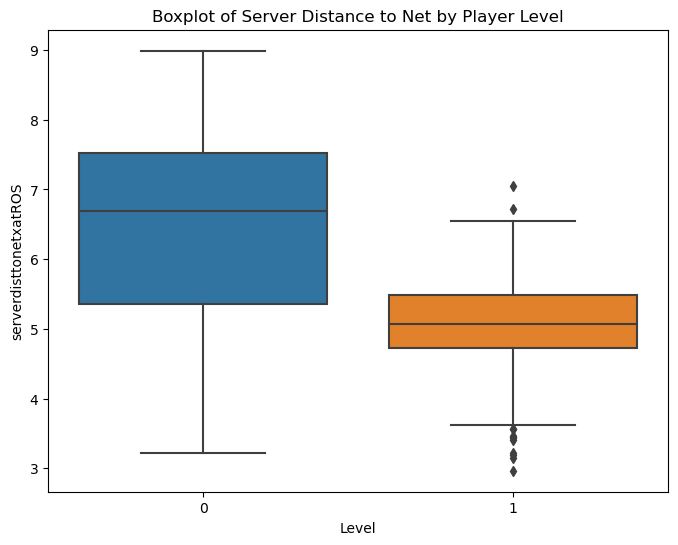

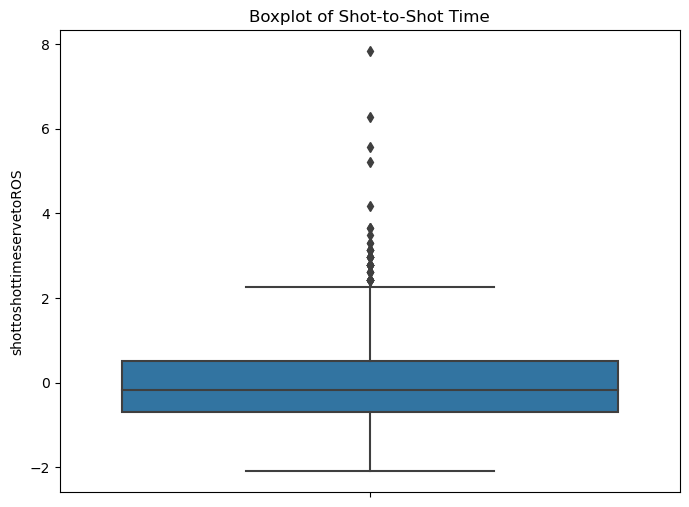

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for serverdisttonetxatROS to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Level', y='serverdisttonetxatROS', data=df)
plt.title('Boxplot of Server Distance to Net by Player Level')
plt.show()

# Boxplot for shottoshottimeservetoROS to check for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['shottoshottimeservetoROS'])
plt.title('Boxplot of Shot-to-Shot Time')
plt.show()

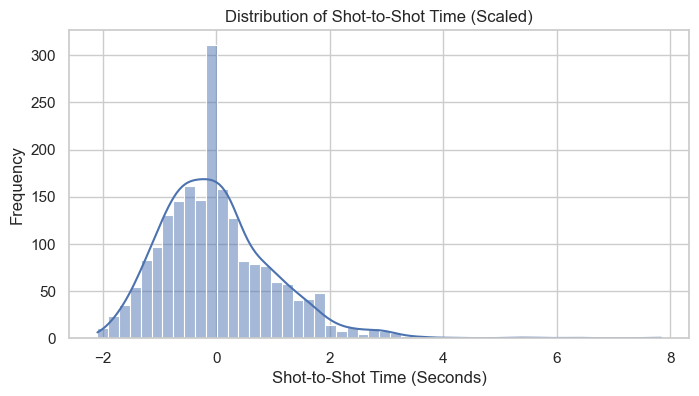

In [85]:
# Set visual style
sns.set(style="whitegrid")

# Histogram for 'shottoshottimeservetoROS'
plt.figure(figsize=(8, 4))
sns.histplot(df['shottoshottimeservetoROS'], kde=True)
plt.title('Distribution of Shot-to-Shot Time (Scaled)')
plt.xlabel('Shot-to-Shot Time (Seconds)')
plt.ylabel('Frequency')
plt.show()

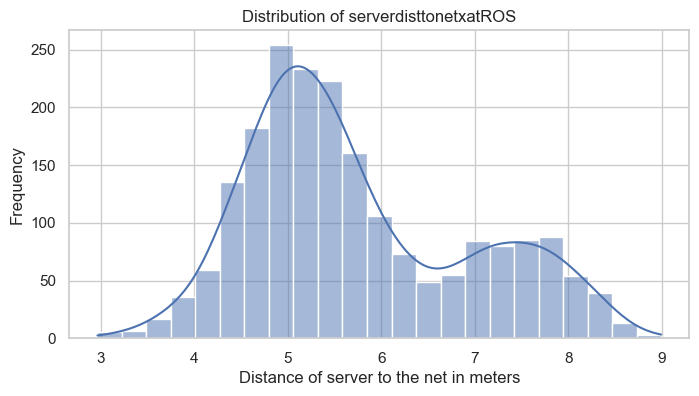

In [87]:
# Set visual style
sns.set(style="whitegrid")

# Histogram for 'serverdisttonetxatROS'
plt.figure(figsize=(8, 4))
sns.histplot(df['serverdisttonetxatROS'], kde=True)
plt.title('Distribution of serverdisttonetxatROS')
plt.xlabel('Distance of server to the net in meters')
plt.ylabel('Frequency')
plt.show()

### Linear Regression Model

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [91]:
# Feature selection
X = df[['AUSTRALIANAJESUS', 'Level', 'shottoshottimeservetoROS']]
y = df['serverdisttonetxatROS']

In [92]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [94]:
# Predict on the testing set
y_pred = model.predict(X_test)

In [95]:
# Calculate Mean Squared Error and the R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.8943790228791887
R-squared: 0.32705569763857745


In [96]:
# Coefficients of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-0.07155429 -1.56296596 -0.2001287 ]
Intercept: 6.589474035115752


### Decision Trees

In [97]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model
tree_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree Mean Squared Error:", mse_tree)
print("Decision Tree R-squared:", r2_tree)


Decision Tree Mean Squared Error: 0.8291544646448608
Decision Tree R-squared: 0.3761316416343712


### Random Forest

In [98]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
forest_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_forest = forest_model.predict(X_test)

# Evaluate the model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("Random Forest Mean Squared Error:", mse_forest)
print("Random Forest R-squared:", r2_forest)


Random Forest Mean Squared Error: 0.8199625033880831
Random Forest R-squared: 0.38304781229249163


### GBM

In [99]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model
gbm_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_gbm = gbm_model.predict(X_test)

# Evaluate the model
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

print("Gradient Boosting Mean Squared Error:", mse_gbm)
print("Gradient Boosting R-squared:", r2_gbm)


Gradient Boosting Mean Squared Error: 0.8333392423186444
Gradient Boosting R-squared: 0.37298295162691064


### SVM

In [100]:
from sklearn.svm import SVR

# Initialize the Support Vector Regressor
svm_model = SVR(kernel='rbf')  # Radial basis function kernel

# Fit the model
svm_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("SVM Mean Squared Error:", mse_svm)
print("SVM R-squared:", r2_svm)


SVM Mean Squared Error: 0.8572473291961814
SVM R-squared: 0.35499414550217934
